In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

  - shuffle = true 表示顺序会随机被打断
  - numworkers = 2 表示双线程进行

In [2]:
transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
trainset = torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data",train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=True,num_workers=2)

classes = ("plane","car","bird","cat","deer","dog","frog","horse","ship","truck")


Files already downloaded and verified
Files already downloaded and verified


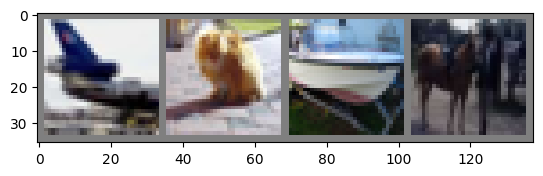

plane  cat shiphorse


In [3]:
# 导入画图包和numpy
import matplotlib.pyplot as plt 
import numpy as np

# 构建展示图片的函数

def imshow(img):
        img = img / 2 + 0.5
        nping = img.numpy()
        plt.imshow(np.transpose(nping,(1,2,0)))
        plt.show()

#从数据迭代器中读取一张图片
dataiter = iter(trainloader)
images,labels = next(dataiter)

#展示图片
imshow(torchvision.utils.make_grid(images))

#打印标签
print("".join("%5s" % classes[labels[j]] for j in range(4)))
print(trainloader)

 # 接下来定义卷积神经网络

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)  ##最后这个全连接层的输出维度是有依据的，因为是分类器模型（10种类别），所以要将输出维度转化为10
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        ##以下一行代码是转换x的维度，目的是为了贴合后面的全连接
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()    

 # 接下来定义损失函数
  - 采用交叉熵损失函数和随机梯度下降优化器

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr= 0.001 , momentum= 0.9)

 # 在训练集上训练模型
  - 采用基于梯度下降的优化算法，都需要很多个轮次的迭代训练

In [18]:
#for epoch in range(2):  ##遍历整体数据两遍，
#     running_loss = 0.0
#     for i ,data in enumerate(trainloader,0):
#         ##data 中包含输入图片张量inputs，标签张量labels
#         inputs,labels = data
        
#         optimizer.zero_grad()
        
#         outputs = net(inputs)
        
#         loss = criterion(outputs,labels)
        
#         loss.backward()
#         optimizer.step()
        
#         ##打印轮次和损失值
#         running_loss += loss.item()  ##将损失值进行累加起来
#         if (i+1) % 2000 == 0: ##写这行代码的目的是每2000次进行一次打印输出损失值
#             print("[%d,%5d] loss: %.3d"%
#                  (epoch+1,i+1,running_loss/2000))
#             running_loss = 0.0

# print("Finished Training")
running_loss = 0.0  
print_freq = 100
for i, (inputs, labels) in enumerate(trainloader):  
    # Forward pass  
    outputs = net(inputs)  
    loss = criterion(outputs, labels)  
  
    # Backward pass and optimization  
    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step()  
  
    # Update running loss  
    running_loss += loss.item()  
  
    # Print loss every 'print_freq' batches  
    if (i+1) % print_freq == 0:  
        print("[%d,%5d] loss: %.3f"%(epoch+1, i+1, running_loss/print_freq))  
        running_loss = 0.0

[1,  100] loss: 1.355
[1,  200] loss: 1.333
[1,  300] loss: 1.379
[1,  400] loss: 1.306
[1,  500] loss: 1.328
[1,  600] loss: 1.333
[1,  700] loss: 1.353
[1,  800] loss: 1.331
[1,  900] loss: 1.429
[1, 1000] loss: 1.331
[1, 1100] loss: 1.305
[1, 1200] loss: 1.325
[1, 1300] loss: 1.293
[1, 1400] loss: 1.345
[1, 1500] loss: 1.357
[1, 1600] loss: 1.339
[1, 1700] loss: 1.353
[1, 1800] loss: 1.395
[1, 1900] loss: 1.351
[1, 2000] loss: 1.366
[1, 2100] loss: 1.383
[1, 2200] loss: 1.228
[1, 2300] loss: 1.366
[1, 2400] loss: 1.389
[1, 2500] loss: 1.430
[1, 2600] loss: 1.325
[1, 2700] loss: 1.376
[1, 2800] loss: 1.308
[1, 2900] loss: 1.342
[1, 3000] loss: 1.408
[1, 3100] loss: 1.331
[1, 3200] loss: 1.379
[1, 3300] loss: 1.278
[1, 3400] loss: 1.403
[1, 3500] loss: 1.396
[1, 3600] loss: 1.394
[1, 3700] loss: 1.389
[1, 3800] loss: 1.382
[1, 3900] loss: 1.291
[1, 4000] loss: 1.287
[1, 4100] loss: 1.364
[1, 4200] loss: 1.376
[1, 4300] loss: 1.379
[1, 4400] loss: 1.372
[1, 4500] loss: 1.390
[1, 4600] 

 - 对模型进行保存

In [11]:
PATH = "./cifar_net.pth"

torch.save(net.state_dict(),PATH)

 # 在测试集上测试模型
  - 在测试集上显示若干图片

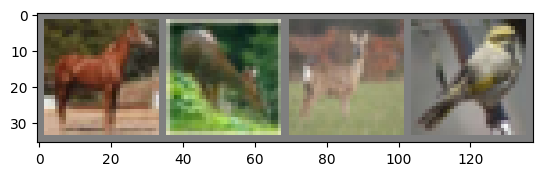

GroundTruth: horse deer deer bird


In [16]:
dataiter = iter(trainloader)
images,labels = next(dataiter)

#展示图片
imshow(torchvision.utils.make_grid(images))

#打印标签
print("GroundTruth:","".join("%5s" % classes[labels[j]] for j in range(4)))


 - 加载模型并且对测试图片进行预测

In [17]:
net = Net() #实例化对象

net.load_state_dict(torch.load(PATH)) ##将训练好的模型加载进来

outputs = net(images)

_, predicted = torch.max(outputs,1) ##等于是在忽略第一个返回值（即最大值），只保留第二个返回值（即最大值对应的索引）

print("predicted:","".join("%5s" % classes[predicted[j]] for j in range(4)))


predicted:  deerhorse deer  dog


 - j接下来看一下在全部测试集上的表现

In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images ,labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs,1)
        total +=labels.size(0) ##获取第一个维度的大小
        correct += (predicted == labels).sum().item()

print("Accuracy  : %d %%" % (100 * correct / total))

Accuracy  : 49 %


 # 将模型转化到GPU上进行运算
  - 首先定义设备，如果CUDA是可用的，则定义成GPU，否则定义成CPU

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [23]:
##将数据移动到GPU上
net.to(device)

inputs , labels = data[0].to(device),data[1].to(device)